In [93]:
import cv2
import numpy as np
import imutils
from matplotlib import pyplot as plt

More tutorials on opencv can be found:

https://docs.opencv.org/master/d2/d96/tutorial_py_table_of_contents_imgproc.html

In [94]:
path = "spheres.png"

# Image input and initial processing
Load the input image (whose path was supplied via command line argument) and display the image to our screen:

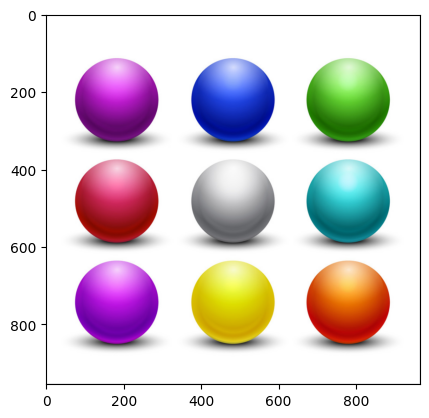

In [95]:
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
plt.imshow(image)

Convert the image to grayscale:

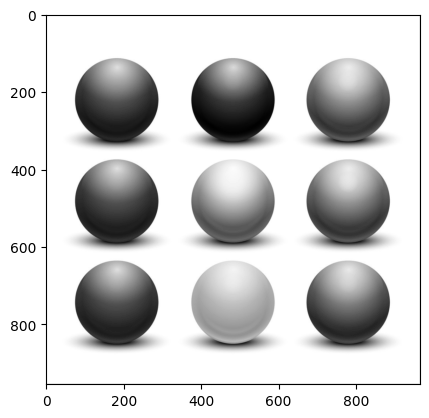

In [96]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

# Advanced processing
Apply edge detection, so we can find the outlines of objects in images:


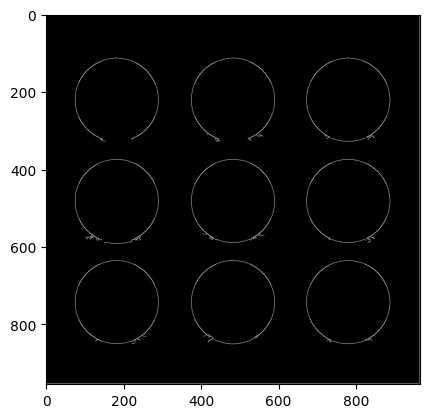

In [97]:
edged = cv2.Canny(gray, 30, 150)
plt.imshow(edged, cmap='gray')

Threshold the image by setting all pixel values equal to or less than 225 to 255 (white; foreground): $x \le 225 \rightarrow x = 255$ and all pixel values greater than 225 to 0 (black; background): $x \gt 225 \rightarrow x=0$

Thereby we are segmenting the image.

Both the threshold (e.g. 225 in our case) and the value for pixels less than the threshold in the resulting image (255 in our case) can be tweaked.

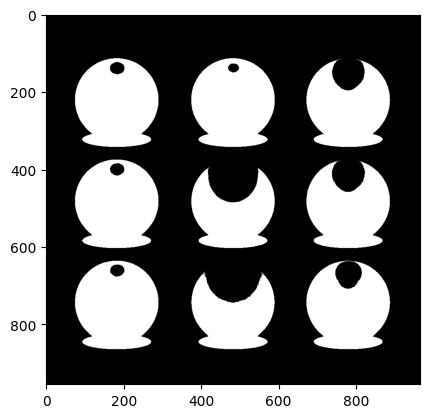

In [98]:
threshold = 200
threshold_value = 255


thresh = cv2.threshold(gray, threshold, threshold_value, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh, cmap='gray')

Find contours (i.e., outlines) of the foreground objects in the thresholded image:

In [99]:
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

Loop over the contours:

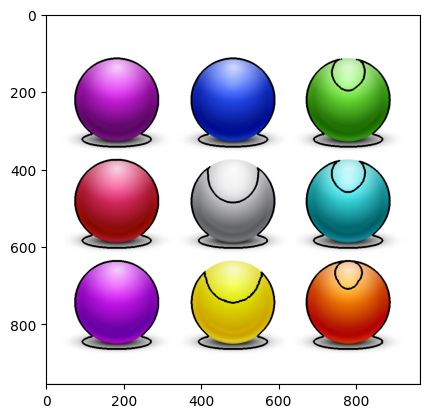

In [100]:
for c in cnts:
    # draw each contour on the output image with a 3px thick black outline
    cv2.drawContours(output, [c], -1, (0, 0, 0), 3)
    
plt.imshow(output)

Draw the total number of contours found in purple:

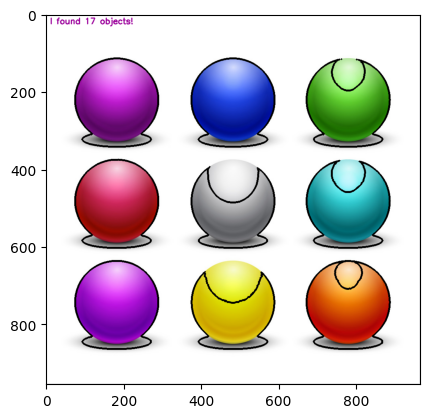

In [101]:
text = "I found {} objects!".format(len(cnts))
cv2.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (155, 0, 155), 2)
plt.imshow(output)

We apply erosions to reduce the size of foreground objects:

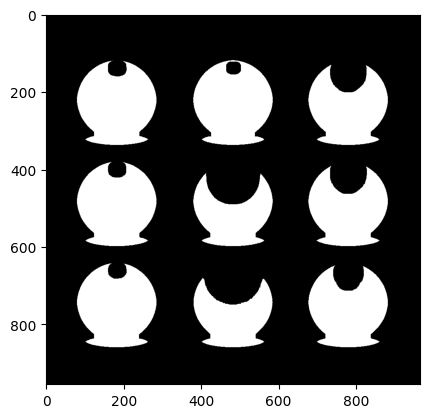

In [102]:
mask = thresh.copy()
mask = cv2.erode(mask, None, iterations = 5)
plt.imshow(mask, cmap = 'gray')

Similarly, dilations can increase the size of the ground objects:

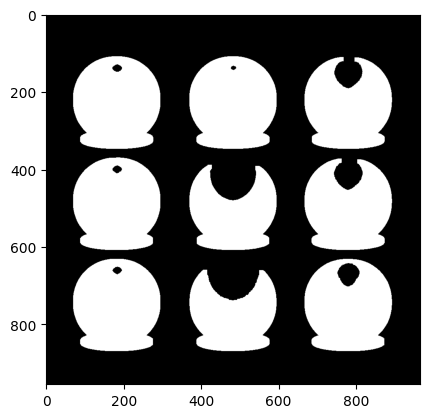

In [103]:
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations = 5)
plt.imshow(mask, cmap='gray')

A typical operation we may want to apply is to take our mask and apply a bitwise `AND` to our input image, keeping only the masked regions:

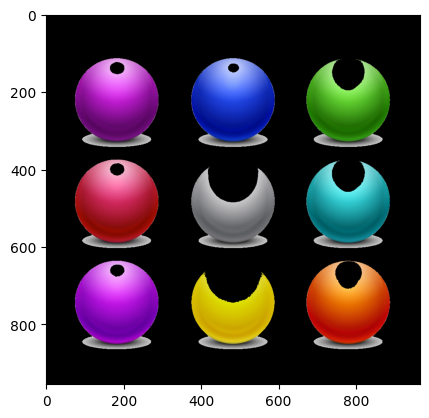

In [104]:
mask = thresh.copy()
output = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(output)

# Exercise 2
1. Can you remove the yellow square from the image?
2. Go through the tutoria, but with the `spheres.png` image. (replace `tetris_blocks.png` with `spheres.png`)
3. Tweak the parameters of the thresholding. Can you threshold all the spheres?
4. Can you remove the red sphere?
5. Can you remove the green sphere?

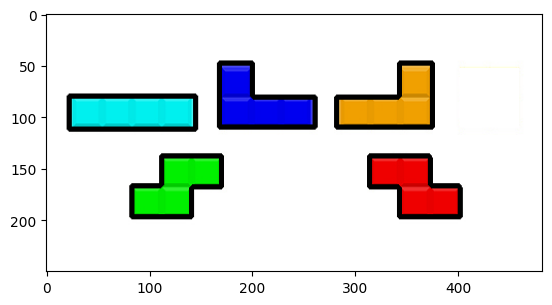

In [105]:
# 1.
path = "tetris_blocks.png"
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

edged = cv2.Canny(gray, 30, 150)
plt.imshow(edged, cmap='gray')

threshold = 225
threshold_value = 255

thresh = cv2.threshold(gray, threshold, threshold_value, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh, cmap='gray')

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

for c in cnts:
    x, y, w, h = cv2.boundingRect(c)

    if x >= 350 and y <= 100 and w == h:  # Adjust values to match the yellow square
        cv2.drawContours(output, [c], -1, (255, 255, 255), -1)  # -1 fills the contour with white
        continue
    else:
        cv2.drawContours(output, [c], -1, (0, 0, 0), 3)

    
plt.imshow(output)

1 25.487796181647273
2 30.0
3 10.522495217747744
4 131.14021801206763
5 120.0
6 102.63220939082095
7 84.2372544143248
8 124.56605459057072
9 48.04361657181202
10 105.66182413169051
11 134.66396248883595


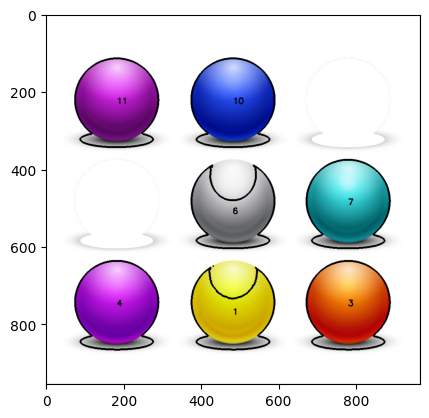

In [154]:
# 2.
path = "spheres.png"
bgr_img = cv2.imread(path)
b,g,r = cv2.split(bgr_img)       # get b,g,r
image = cv2.merge([r,g,b])
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap = 'gray')

edged = cv2.Canny(gray, 30, 150)
plt.imshow(edged, cmap='gray')

threshold = 209
threshold_value = 255

thresh = cv2.threshold(gray, threshold, threshold_value, cv2.THRESH_BINARY_INV)[1]
plt.imshow(thresh, cmap='gray')

cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image.copy()

for i, c in enumerate(cnts):
    # Create a mask of zeros, same size as the image
    mask = np.zeros(image.shape[:2], dtype="uint8")
    
    # Draw the contour on the mask, filling the inside of the contour with white
    cv2.drawContours(mask, [c], -1, 255, -1)
    
    # Mask the original image and calculate the mean RGB values within the contour
    mean_val = cv2.mean(hsv_image, mask=mask)
    
    # Calculate the centroid of the contour
    M = cv2.moments(c)
    if M["m00"] != 0:  # To avoid division by zero
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0
    
    # Draw the contour number on the image at the centroid position
    cv2.putText(output, f"{i + 1}", (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)

    mean_hue = mean_val[0]
    mean_sat = mean_val[1]
    mean_val_v = mean_val[2]
    
    print(i+1, mean_hue)
    green = 45 <= mean_hue <= 50
    red = (122 <= mean_hue <= 125) 
 
    if green:
        cv2.drawContours(output, [c], -1, (255, 255, 255), -1)  # -1 fills the contour with white
    elif red:
        cv2.drawContours(output, [c], -1, (255, 255, 255), -1)  # -1 fills the contour with white
    else:
    # Draw the contour itself with a black outline
        cv2.drawContours(output, [c], -1, (0, 0, 0), 3)
    
plt.imshow(output)

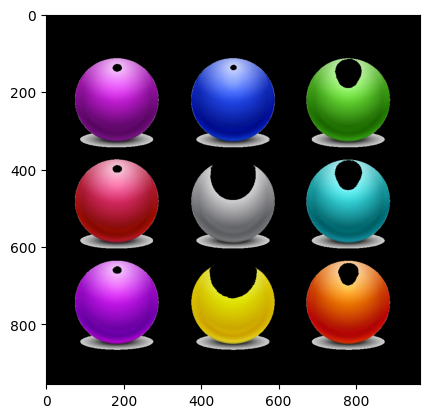

In [119]:
mask = thresh.copy()
output = cv2.bitwise_or(image, image, mask=mask)
plt.imshow(output)